# HarvestStat Data Analysis - Ethiopia

# Issue: Suspiciously high yield values in Ethipia

In [2]:
import json, requests
import pandas as pd
host = 'https://fdw.fews.net'
auth = tuple(json.loads(open('token.json', "r").read()))
parameters = {
    'format': 'json',
    'country': 'Ethiopia',
    'product': 'R011',
    'survey_type': 'crop:best'
}
endpoint = '/api/cropproductionindicatorvalue/'
response = requests.get(host + endpoint, auth=auth, params=parameters, proxies={})
response.raise_for_status()
df = pd.DataFrame.from_records(response.json())
df[
    (df['product'].isin(['Maize (Corn)', 'Maize Grain (Fresh)'])) &
    (df['indicator'] == 'Yield') &
    (df['season_year'] == 'Meher 2017')
][['geographic_unit_full_name','fnid','season_year','indicator','value','product']]

,geographic_unit_full_name,fnid,season_year,indicator,value,product
18872,"Northwest Tigray, Tigray, Ethiopia",ET2014A20101,Meher 2017,Yield,3.319033,Maize (Corn)
18938,"Central Tigray, Tigray, Ethiopia",ET2014A20102,Meher 2017,Yield,2.511105,Maize (Corn)
19011,"East Tigray, Tigray, Ethiopia",ET2014A20103,Meher 2017,Yield,2.294243,Maize (Corn)
19082,"South Tigray, Tigray, Ethiopia",ET2014A20104,Meher 2017,Yield,1.824105,Maize (Corn)
19157,"West Tigray, Tigray, Ethiopia",ET2014A20105,Meher 2017,Yield,3.596917,Maize (Corn)
19250,"North Gondar, Amhara, Ethiopia",ET2014A20301,Meher 2017,Yield,3.527040,Maize (Corn)
19330,"South Gondar, Amhara, Ethiopia",ET2014A20302,Meher 2017,Yield,3.351457,Maize (Corn)
19408,"North Wollo, Amhara, Ethiopia",ET2014A20303,Meher 2017,Yield,2.203558,Maize (Corn)
19493,"South Wollo, Amhara, Ethiopia",ET2014A20304,Meher 2017,Yield,2.710436,Maize (Corn)
19560,"North Shewa (AM), Amhara, Ethiopia",ET2014A20305,Meher 2017,Yield,3.283988,Maize (Corn)


## Validation with FAOSTAT and CHIRPS Precipitation

Meher-Maize Correlation:
           FAO        HS      PRCP
FAO   1.000000  0.816971  0.002480
HS    0.816971  1.000000 -0.199952
PRCP  0.002480 -0.199952  1.000000


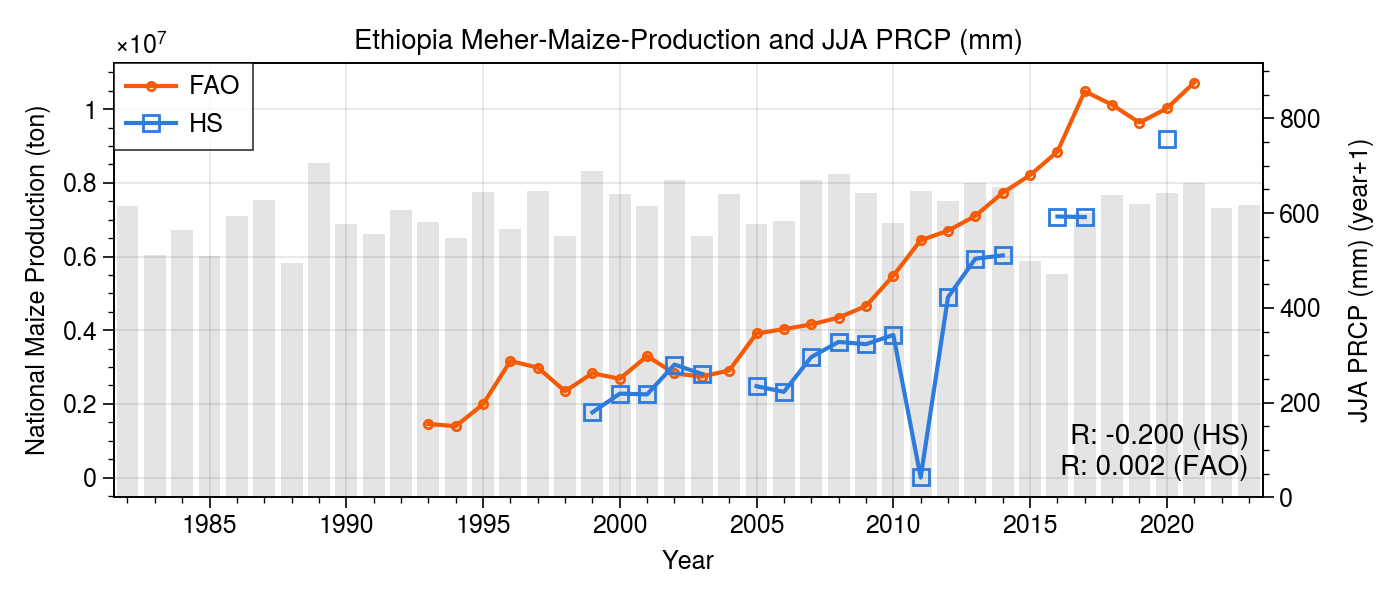

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import proplot as pplot
# Load Crop Data ------------------------------------- #
country_name, season_name, product_name_fdw, product_name_fao,  = 'Ethiopia', 'Meher', 'Maize', 'Maize (corn)'
shape_code, prcp_start_month, prcp_season_name, prcp_year_offset = 'ET2019A0', 6, 'JJA PRCP (mm)', +1
# HarvestStat
df = pd.read_csv('../public/hvstat_data.csv', index_col=0)
df = df[
    (df['country'] == country_name) &
    (df['season_name'] == season_name) &
    (df['product'].isin([product_name_fdw])) &
    (df['indicator'] == 'production')
].copy()
df['year'] = df['harvest_year']
data_hs = df.pivot_table(index='year',columns='product',values='value',aggfunc='sum').squeeze()
# FAO-STAT
df = pd.read_csv('../data/crop/adm_fao_stat.csv', index_col=0)
data_fao = df[
    (df['cnt_name'] == country_name) &
    (df['cpc2_name'] == product_name_fao) &
    (df['indicator'] == 'Production')
].set_index('year')['value']
# Merge
data = pd.concat([data_fao,data_hs], axis=1, keys=['FAO','HS']).sort_index()
data = data.reindex(np.array(range(1982,2024)))
# ---------------------------------------------------- #
# Load precipitation --------------------------------- #
fn = '../data/prcp_chirps-v2.hdf'
prcp_nat = pd.read_hdf(fn)[shape_code].resample('1M').agg('sum')
prcp_nat.index = prcp_nat.index.map(lambda x: x.replace(day=1))
prcp_nat.name = 'PRCP'
prcp_nat.index = prcp_nat.index + pd.DateOffset(years=prcp_year_offset)
# Forward rolling summation
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=3)   # Forward Rolling Window
prcp_nat = prcp_nat.rolling(window=indexer, min_periods=3).sum()
prcp_nat = prcp_nat[prcp_nat.index.month == prcp_start_month]                      # Start month
prcp_nat = prcp_nat.groupby(prcp_nat.index.year).sum()
prcp_label = prcp_season_name
# Correlations
corr_value = pd.concat([data,prcp_nat],axis=1).corr()
print(f'{season_name}-{product_name_fdw} Correlation:\n{corr_value}')
# ---------------------------------------------------- #
# Comparison with Precipitation ---------------------- #
fig, ax1 = plt.subplots(figsize=(7,3))
fig.set_facecolor('white')
data.plot(ax=ax1, grid=True, markerfacecolor='None',color=['#F55A05','#2C7BDD'])
marker = ['.','s']
for i, line in enumerate(ax1.get_lines()):
    line.set_marker(marker[i])
# years = data.index
# ax1.set_xticks(years)
# ax1.set_xticklabels(['%02d'% yr for yr in np.mod(years,100)])
ax1.set_xlim([data.index[0]-0.5, data.index[-1]+0.5])
ax1.set_xlabel('Year')
ax1.set_ylabel('National %s Production (ton)' % product_name_fdw)
ax1.patch.set_facecolor('white')
# Precipitation
year, value = prcp_nat.index, prcp_nat.values
ax2 = ax1.twinx()
plt.bar(year, value, alpha=.25, color='grey')
ax2.set_ylim([0, value.max()*1.3])
ax2.set_ylabel(prcp_label + ' (year+%d)'%prcp_year_offset, labelpad=10)
ax2.grid(False)
ax1.set_zorder(1)  
ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2
ax1.legend(loc='upper left')
ax1.annotate(
    'R: %.3f (HS)\nR: %.3f (FAO)' % (corr_value.loc['HS','PRCP'], corr_value.loc['FAO','PRCP']), 
    xy=(1, 0.2), xycoords='axes fraction', fontsize=10,
    xytext=(-5, -5), textcoords='offset points',
    ha='right', va='top'
)
title = f'{country_name} {season_name}-{product_name_fdw}-Production and {prcp_label}'
ax1.set_title(title)
fig.tight_layout()
plt.show()
# ---------------------------------------------------- #